In [32]:
import os
import keras
import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

228827136/228813984 [==============================] - 11s 0us/step


In [6]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)

In [7]:
data_dir=pathlib.Path(data_dir)

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
print(os.listdir(flowers_root))

['sunflowers', 'LICENSE.txt', 'roses', 'daisy', 'tulips', 'dandelion']


In [10]:
print(flowers_root)

/root/.keras/datasets/flower_photos


In [11]:
tulips=list(data_dir.glob('tulips/*'))

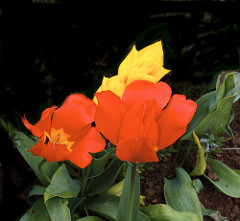

In [14]:
PIL.Image.open(str(tulips[10]))
  



In [15]:
#ما اندازه تصاویر موجود در مجموعه داده خود را تغییر می دهیم زیرا اندازه آنها متفاوت است. برای این کار ارتفاع و عرض تصویر را مشخص می کنیم. همچنین اندازه دسته ای را مشخص می کنیم که تعداد تصاویر استفاده شده توسط مدل در طول هر دوره است.
batch_size=32
image_height=250
image_width=250

In [16]:
#dividing the images in an 80:20 ratio for classification. The training ratio is 0.8, whereas the validation ratio is 0.2.
train_data=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height,image_width),
    batch_size=batch_size
)




Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [17]:
validation_data=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height,image_width),
    batch_size=batch_size

)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [20]:
class_names=train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


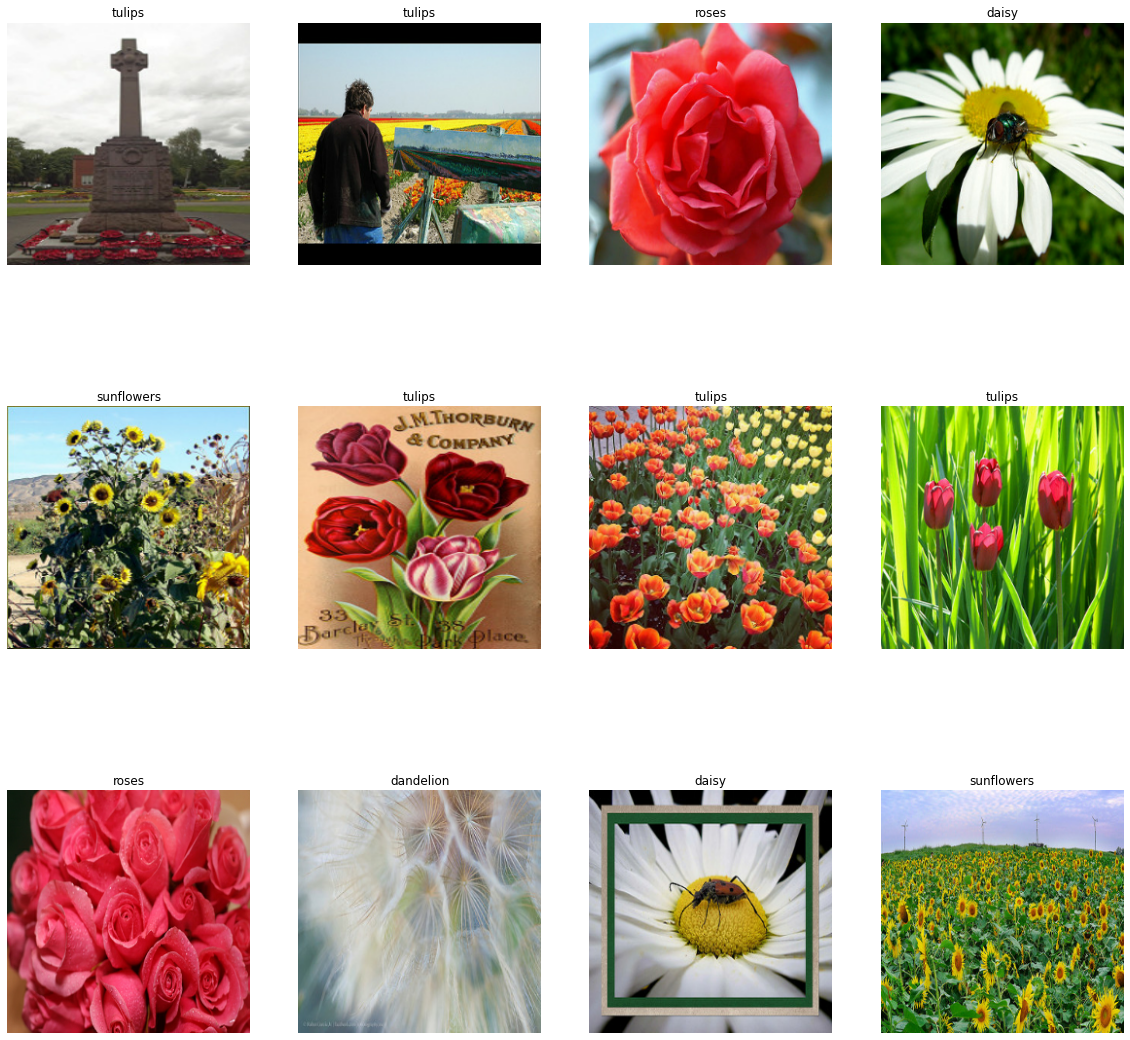

In [28]:
plt.figure(figsize=(20,20))
for images,labels in train_data.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")




In [30]:
num_classes=len(class_names)
print(num_classes)

5


In [41]:
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(image_height,image_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
    ])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        1

In [44]:
epochs=15
history=model.fit(
    train_data, validation_data=validation_data,
    epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 20s 88ms/step - loss: 1.3073 - accuracy: 0.4530 - val_loss: 1.1116 - val_accuracy: 0.5395
Epoch 2/15
92/92 [==============================] - 8s 80ms/step - loss: 0.9422 - accuracy: 0.6393 - val_loss: 0.9632 - val_accuracy: 0.6322
Epoch 3/15
92/92 [==============================] - 9s 91ms/step - loss: 0.7392 - accuracy: 0.7241 - val_loss: 0.9973 - val_accuracy: 0.6213
Epoch 4/15
92/92 [==============================] - 8s 81ms/step - loss: 0.4543 - accuracy: 0.8321 - val_loss: 1.2112 - val_accuracy: 0.6185
Epoch 5/15
92/92 [==============================] - 8s 81ms/step - loss: 0.2278 - accuracy: 0.9261 - val_loss: 1.6234 - val_accuracy: 0.5899
Epoch 6/15
92/92 [==============================] - 8s 81ms/step - loss: 0.1252 - accuracy: 0.9625 - val_loss: 1.5591 - val_accuracy: 0.6431
Epoch 7/15
92/92 [==============================] - 8s 81ms/step - loss: 0.0923 - accuracy: 0.9738 - val_loss: 1.5400 - val_accuracy: 0.6049
Epoch 8/15
92/92 [=====

In [45]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [47]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 26.9 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 2.3 MB 59.1 MB/s 
     |████████████████████████████████| 112 kB 63.3 MB/s 
     |████████████████████████████████| 270 kB 70.6 MB/s 
     |████████████████████████████████| 212 kB 72.0 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 4.6 MB/s 
     |████████████████████████████████| 57 kB 6.8 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 11.5 MB/s 
     |████████████████████████████████| 68 kB 8.5 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 856 kB 62.6 MB/s 
     |████████████████████████████████| 594 kB 7

In [48]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [49]:
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://45206.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f4c801eab10>,
 'http://127.0.0.1:7860/',
 'https://45206.gradio.app')